## Titanic Survival Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##Data Collection

In [ ]:
data = pd.read_csv('/content/titanic_train.csv')

##Exploratory Data Analysis


In [ ]:
data.shape

(891, 12)

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
data.drop(['PassengerId', 'Ticket', 'Name'], axis = 1, inplace = True)

In [ ]:
data.duplicated().sum()

107

In [ ]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
data.drop('Cabin', axis = 1, inplace = True)

In [ ]:
data.duplicated().sum()

111

In [ ]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [ ]:
## Embarked is categorical so,  it is imputed with the mode value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


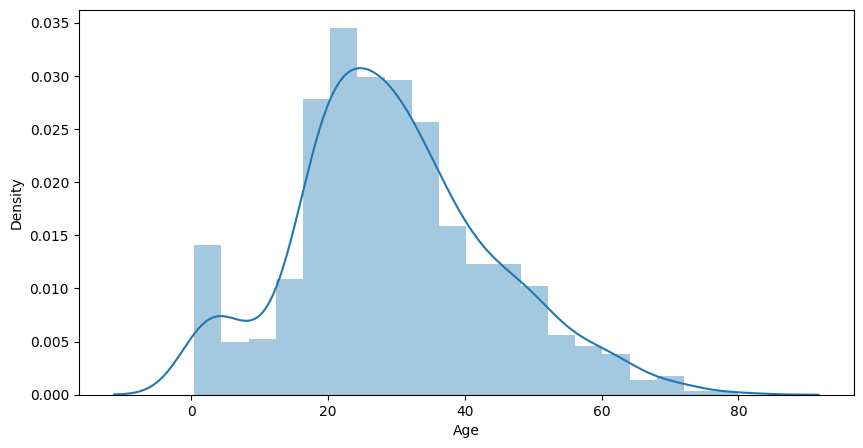

In [ ]:
## To impute the age column first we need to always check the distribution of the columns and if the
## distribution is normal then impute it with median or else with mode

plt.figure(figsize = (10, 5))
sns.distplot(data['Age'])
plt.show()

In [ ]:
## Here from the distribution , the skewness is right skewness or positive skewnwss so, here mean is greater than median.
## So fill the Age column with mean

data['Age'].fillna(data['Age'].mean(), inplace = True)

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
object_columns = data.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Sex', 'Embarked'], dtype='object')

Numerical type columns:
Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [ ]:
def classify_features(data):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in data.columns:
        if data[column].dtype == 'object':
            if data[column].nunique() < 30:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif data[column].dtype in ['int64', 'float64']:
            if data[column].nunique() < 30:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(data)

print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Sex', 'Embarked']
Non-Categorical Features: []
Discrete Features: ['Survived', 'Pclass', 'SibSp', 'Parch']
Continuous Features: ['Age', 'Fare']


## Data Visualization

In [ ]:
for i in discrete:
    print(i)
    print(data[i].unique())
    print()

Survived
[0 1]

Pclass
[3 1 2]

SibSp
[1 0 3 4 2 5 8]

Parch
[0 1 2 5 3 4 6]



In [ ]:
for i in discrete:
    print(data[i].value_counts())
    print()

Survived
0    549
1    342
Name: count, dtype: int64

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64



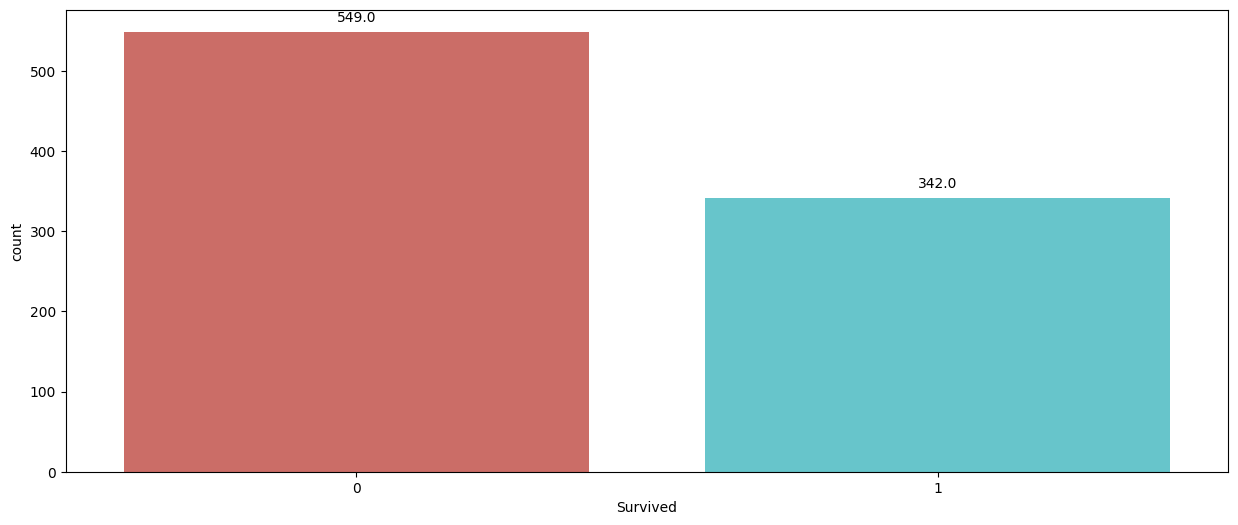

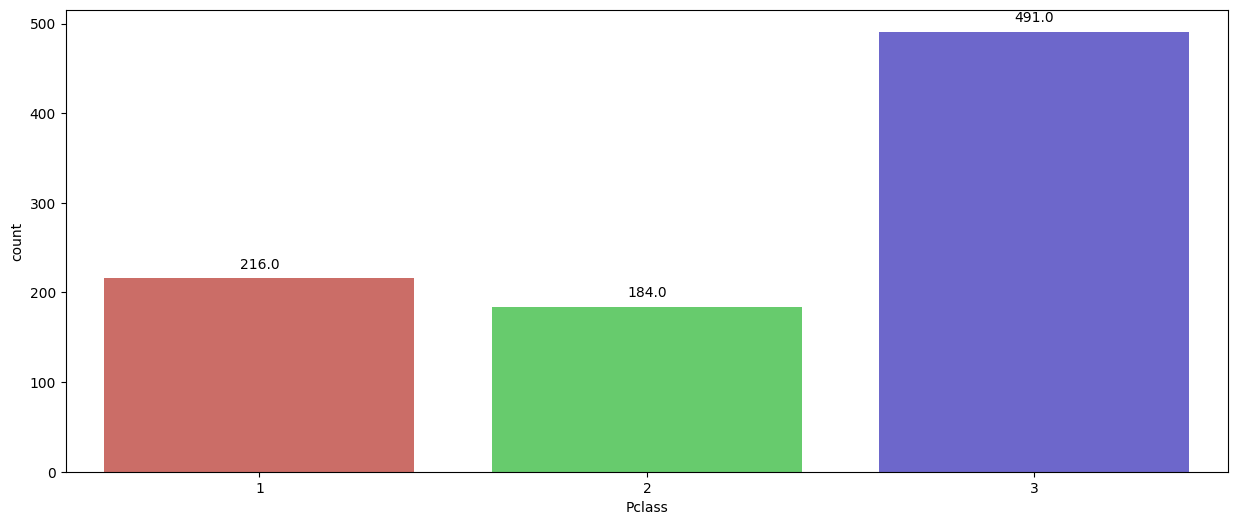

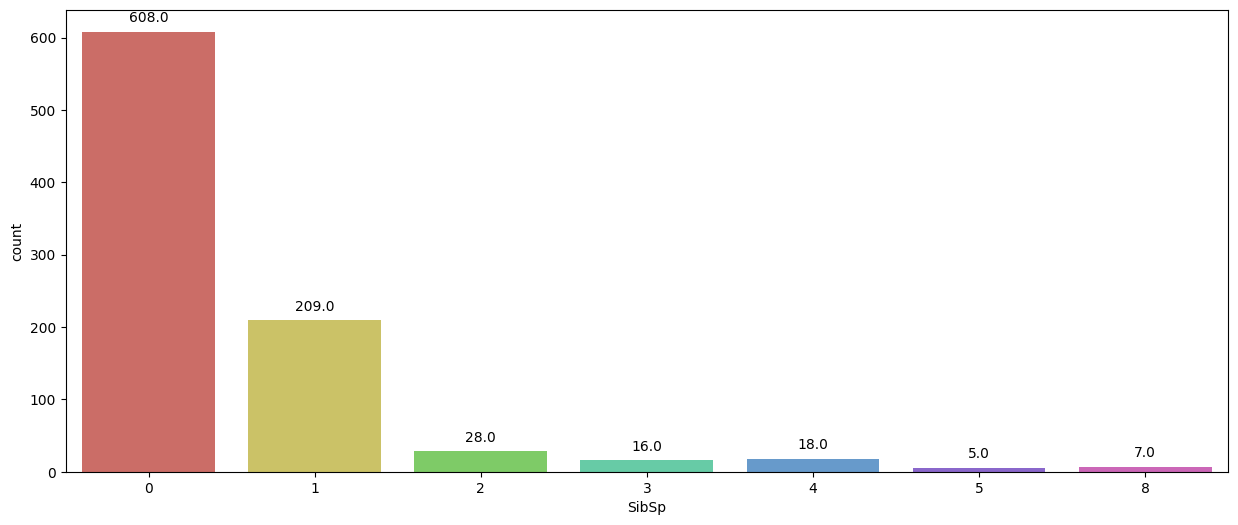

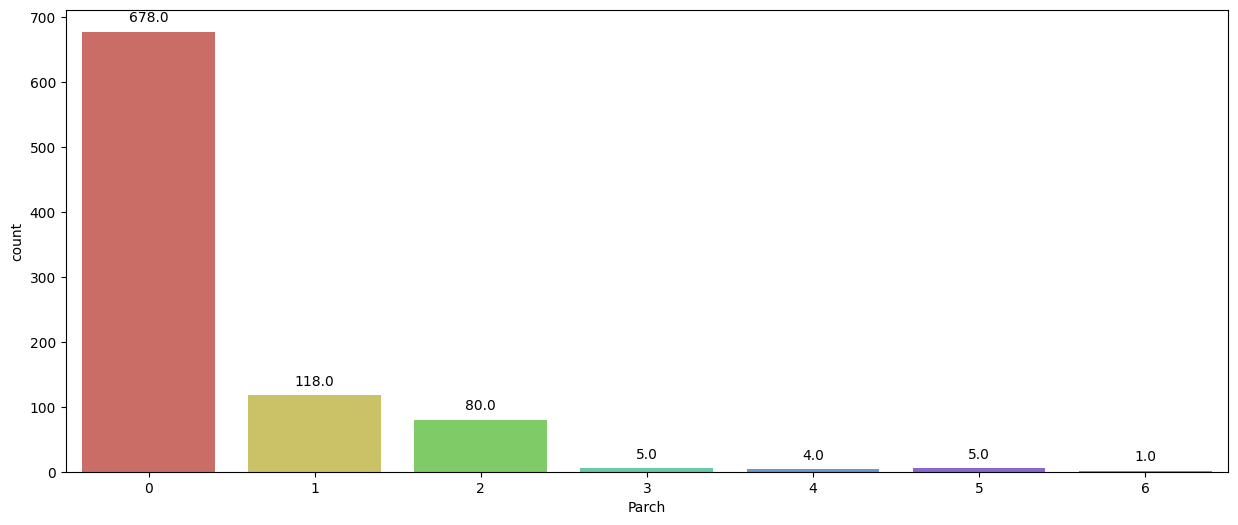

In [ ]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=data, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

In [ ]:
import plotly.express as px

for i in discrete:
    counts = data[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [ ]:
for i in categorical:
    print(i)
    print(data[i].unique())
    print()

Sex
['male' 'female']

Embarked
['S' 'C' 'Q']



In [ ]:
for i in categorical:
    print(i)
    print(data[i].value_counts())
    print()

Sex
Sex
male      577
female    314
Name: count, dtype: int64

Embarked
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64



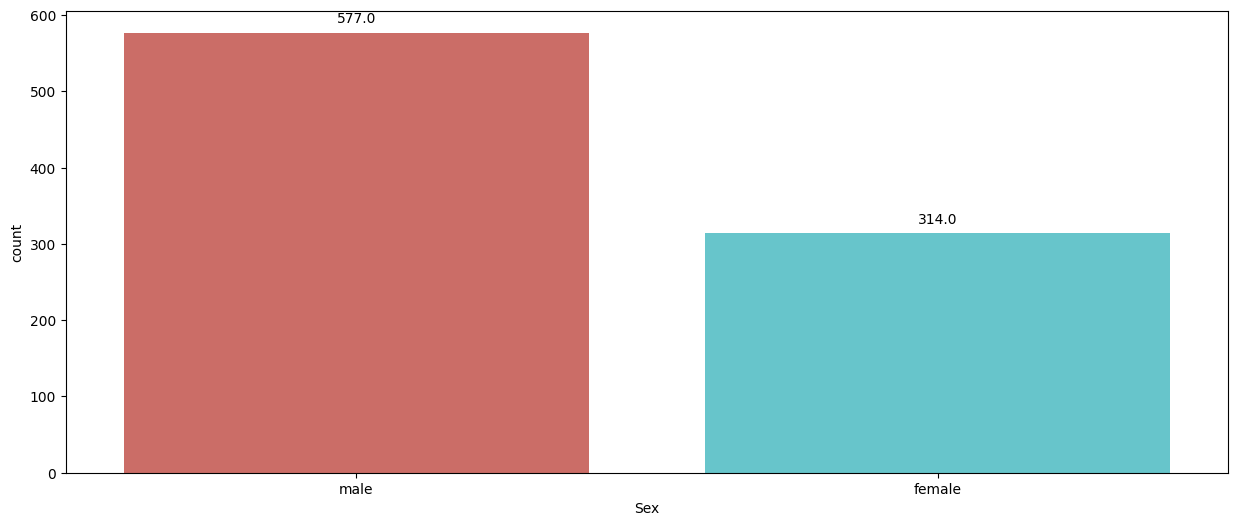

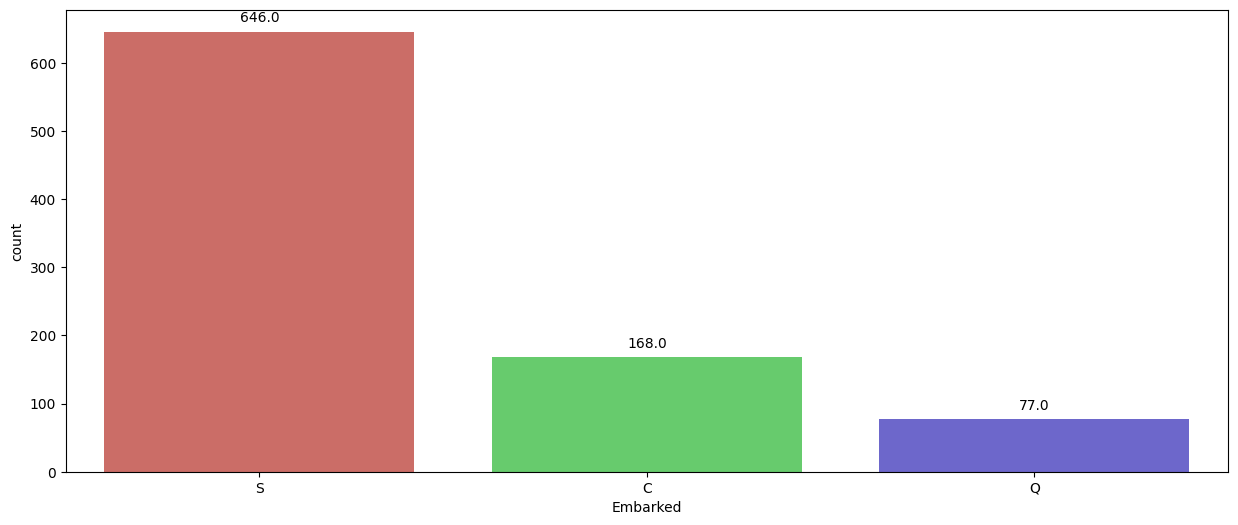

In [ ]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=data, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

In [ ]:
for i in categorical:
    counts = data[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

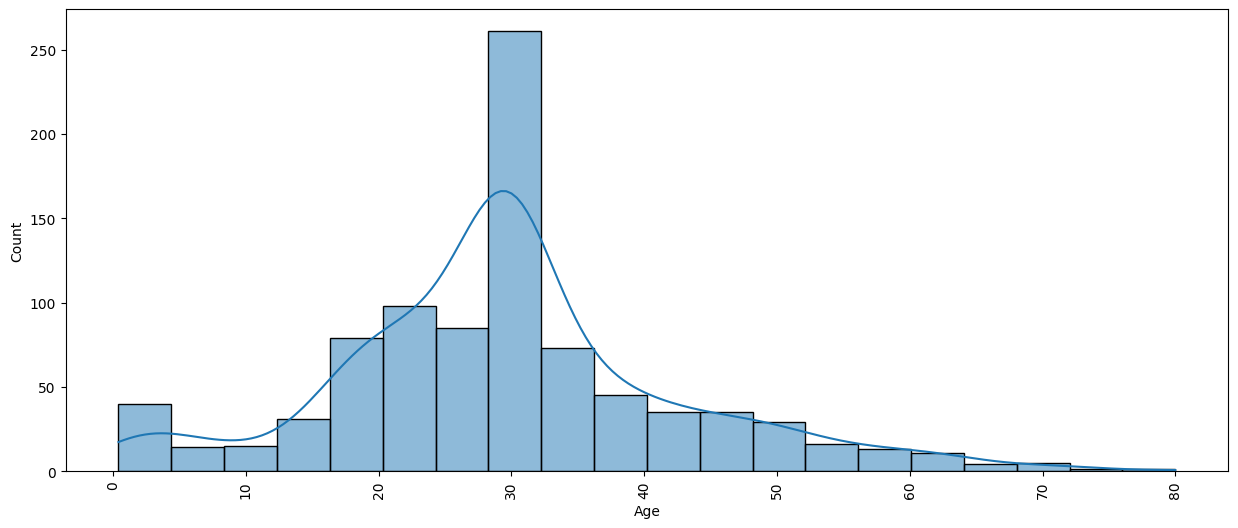

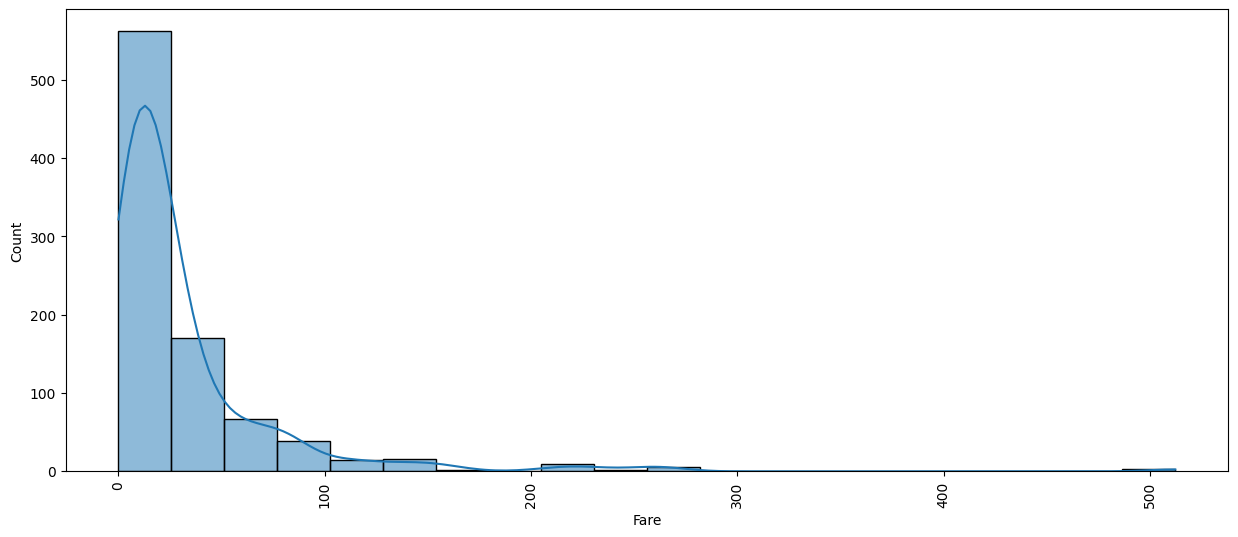

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(data[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

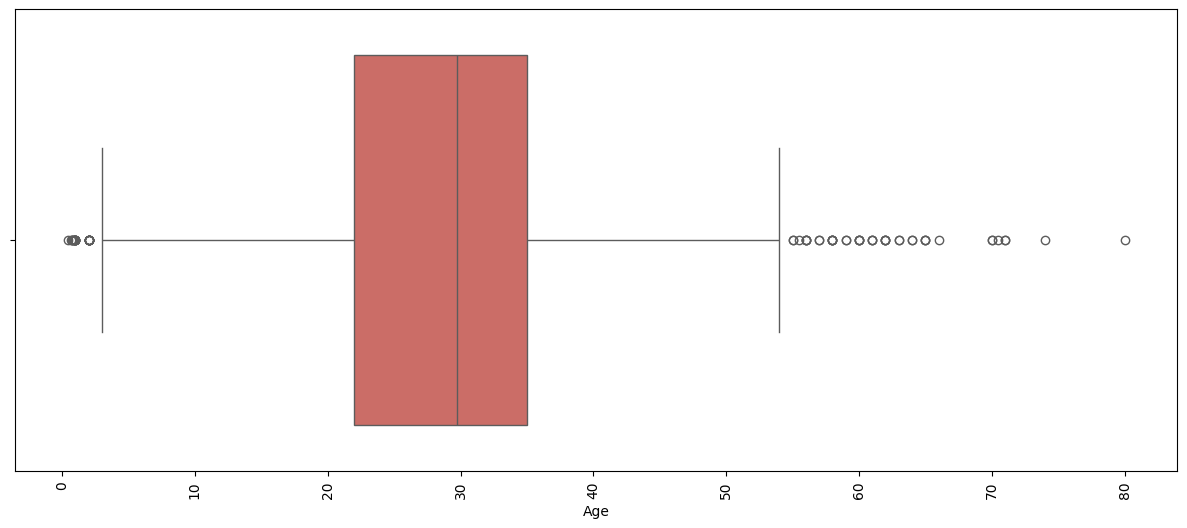

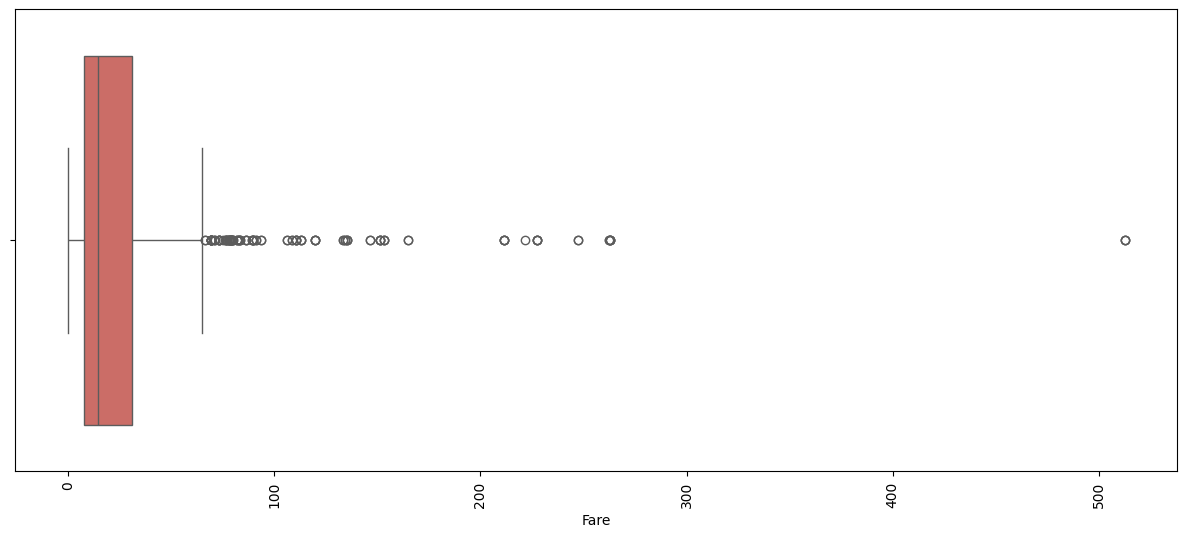

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=data, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

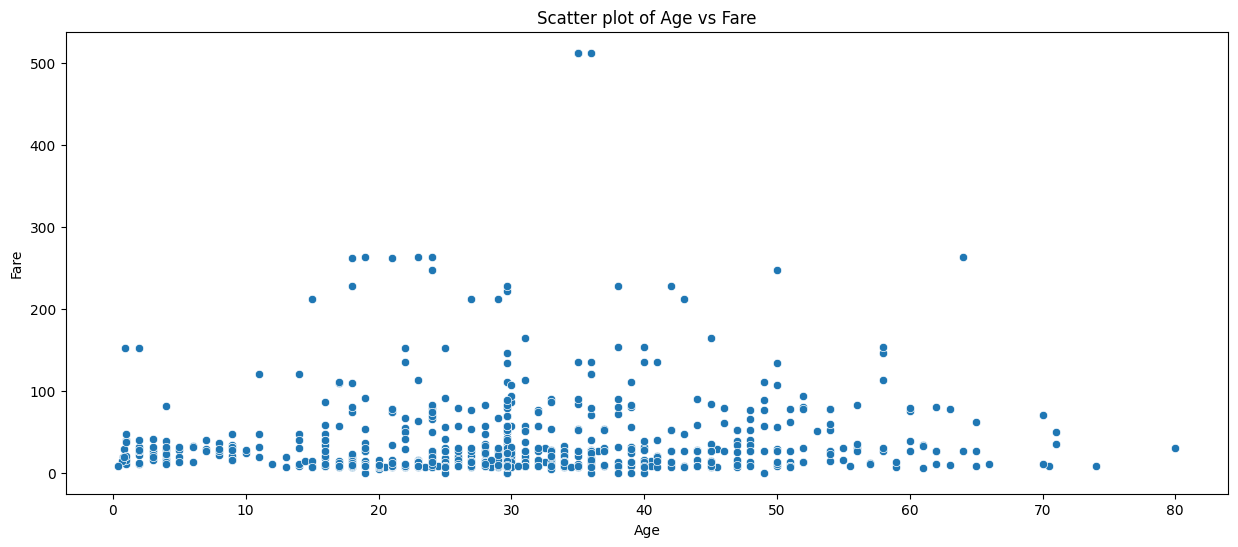

In [ ]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=continuous[i], y=continuous[j], data=data, palette='hls')
        plt.title(f'Scatter plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

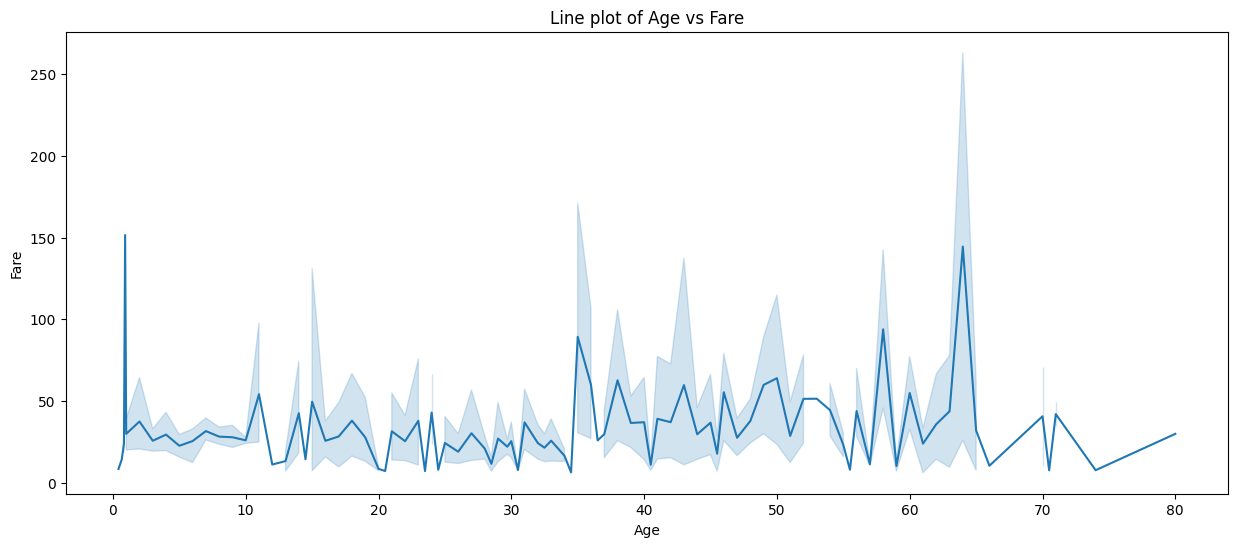

In [ ]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.lineplot(x=continuous[i], y=continuous[j], data=data, palette='hls')
        plt.title(f'Line plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

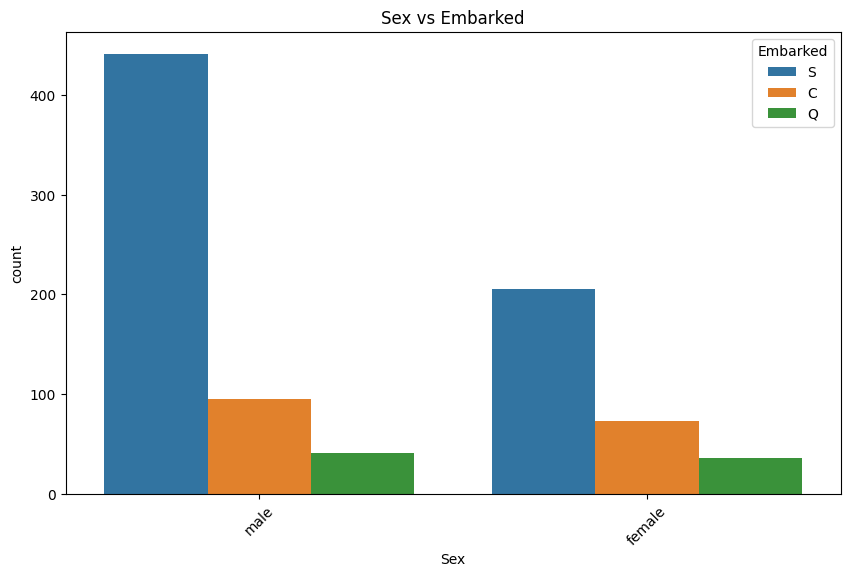

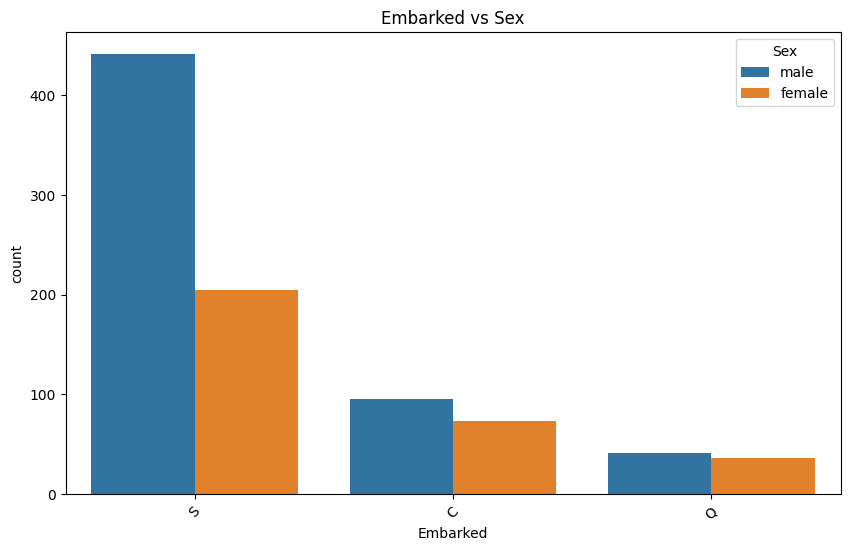

In [ ]:
for cat1 in categorical:
    for cat2 in categorical:
        if cat1 != cat2:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=data, x=cat1, hue=cat2)
            plt.title(f'{cat1} vs {cat2}')
            plt.xticks(rotation = 45)
            plt.show()

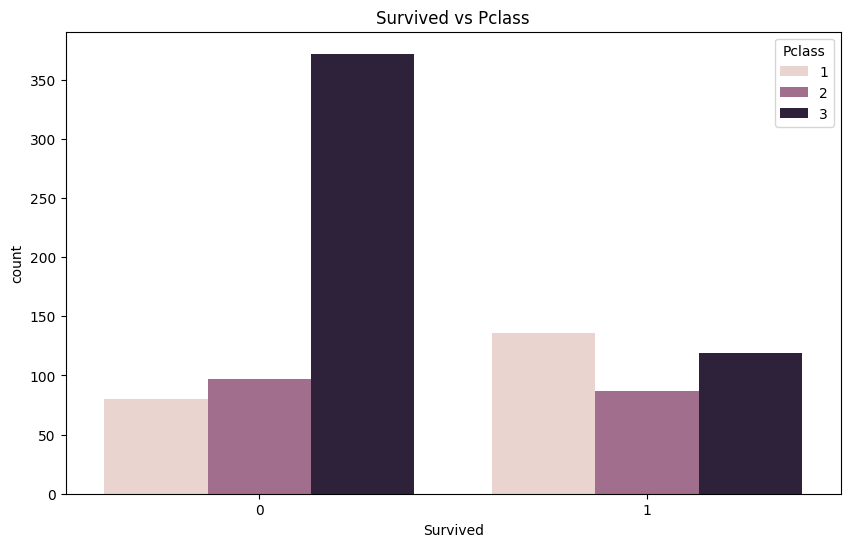

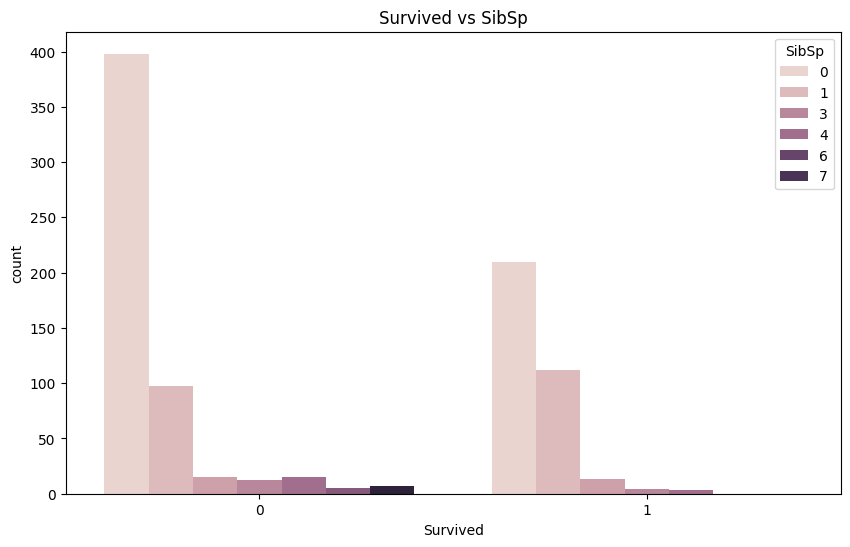

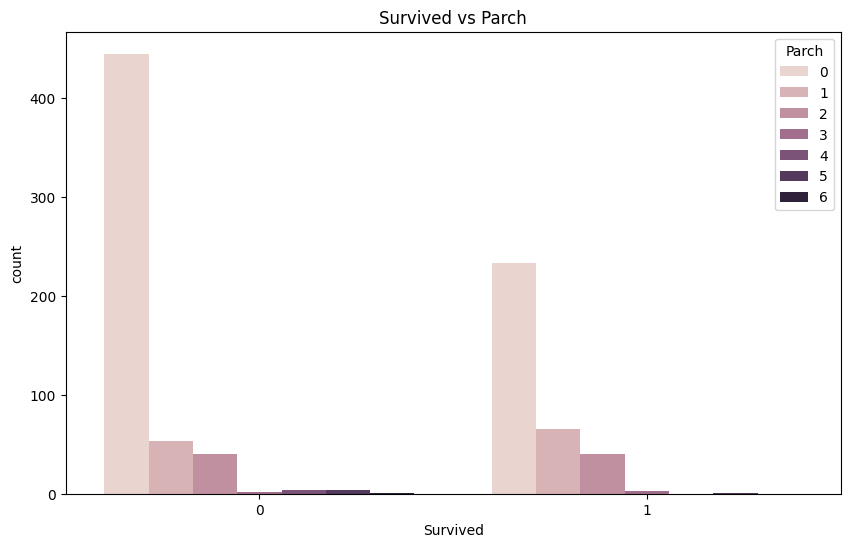

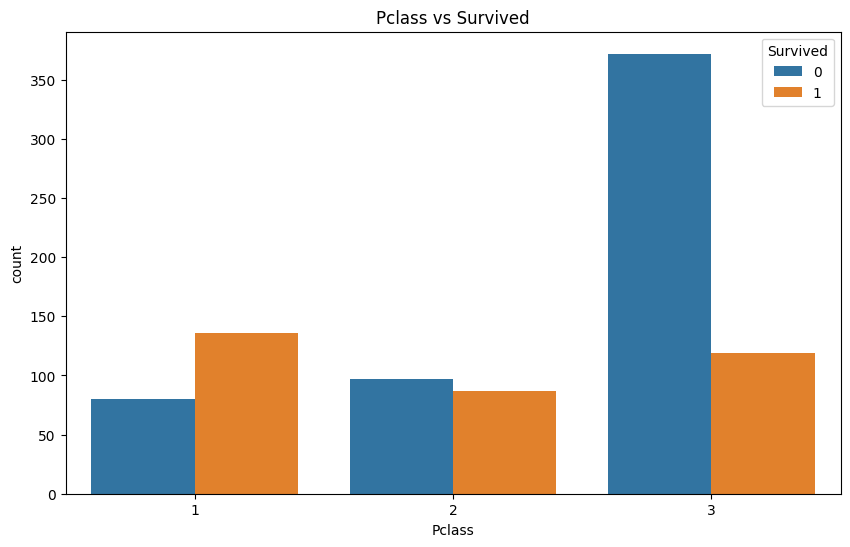

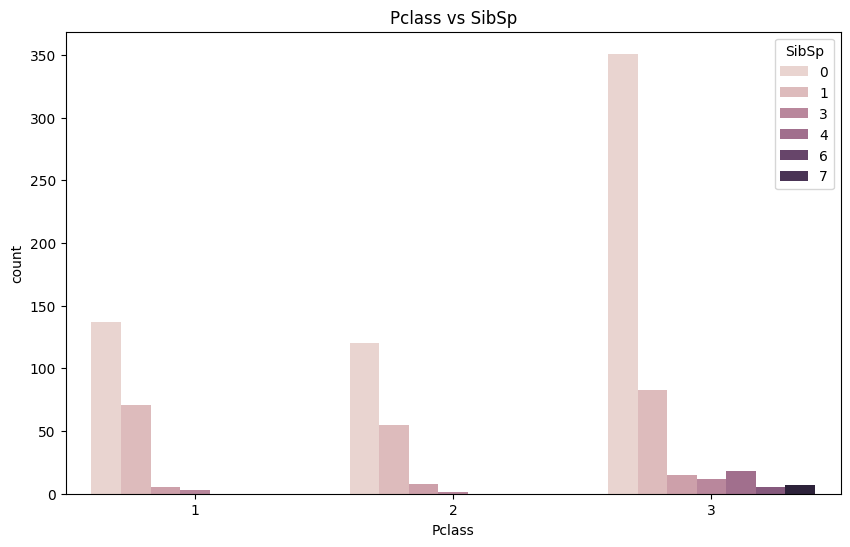

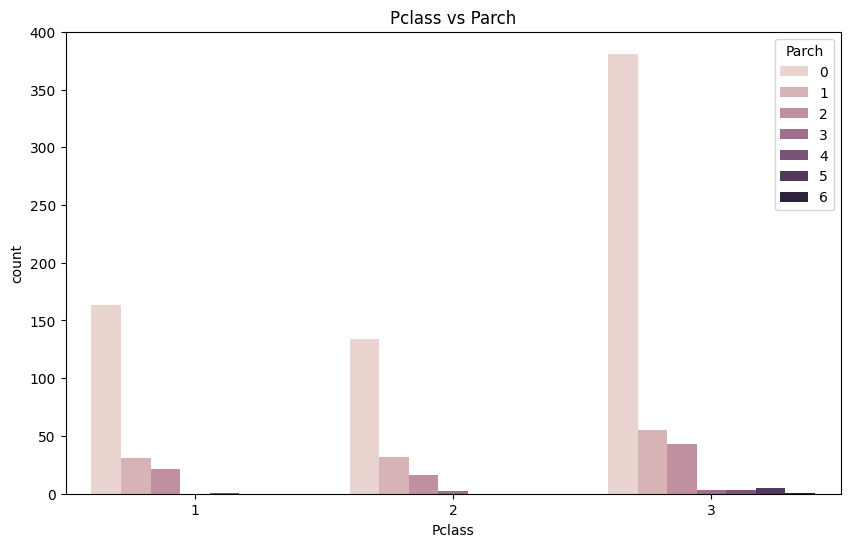

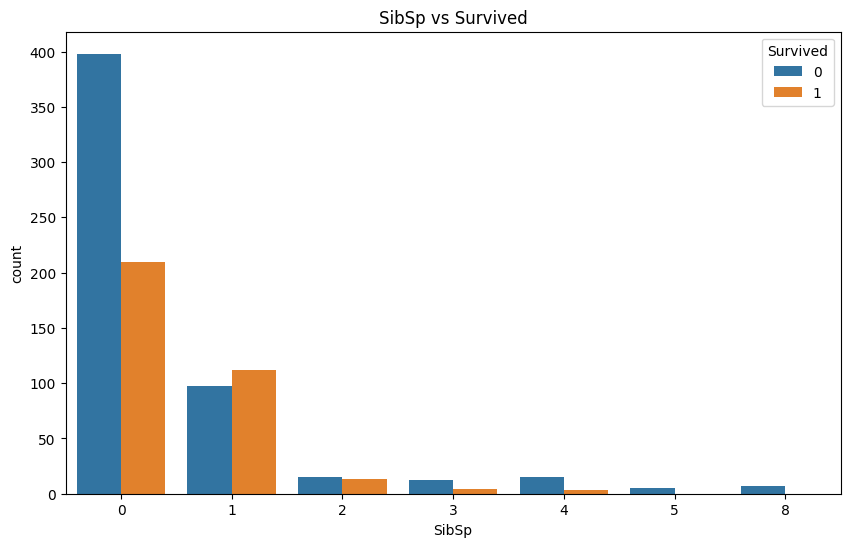

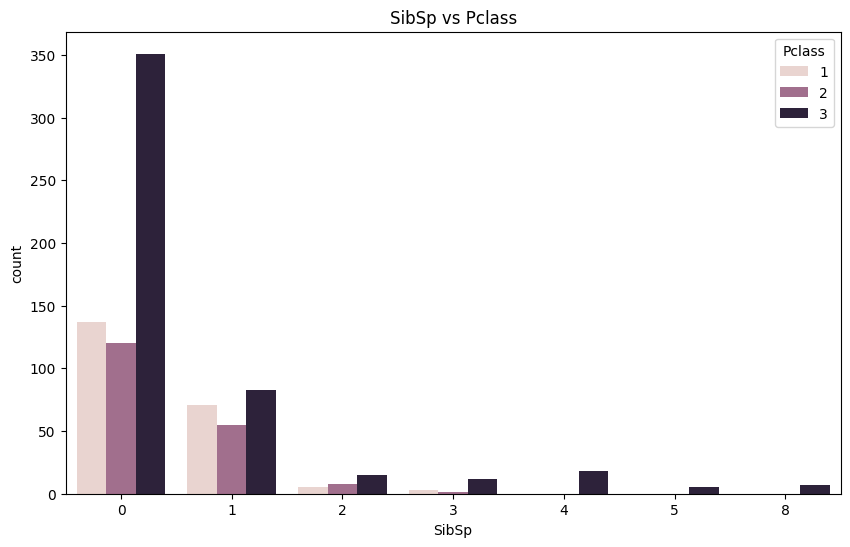

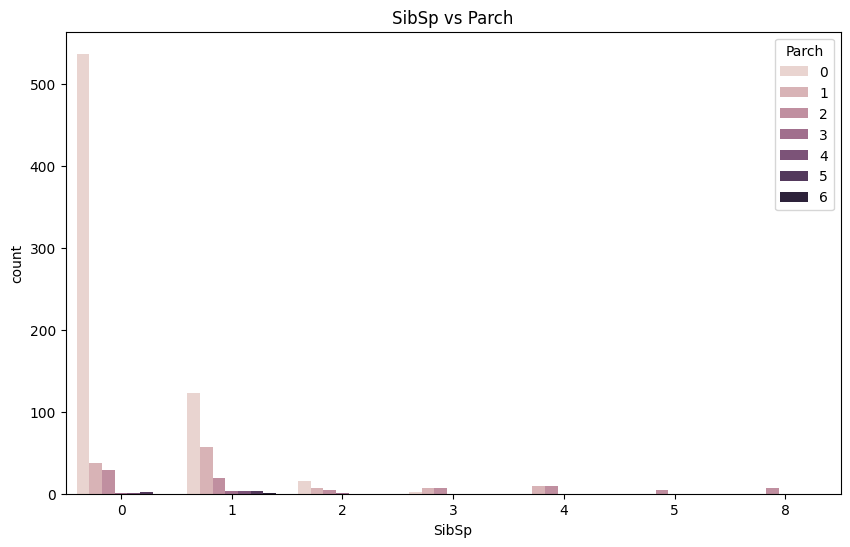

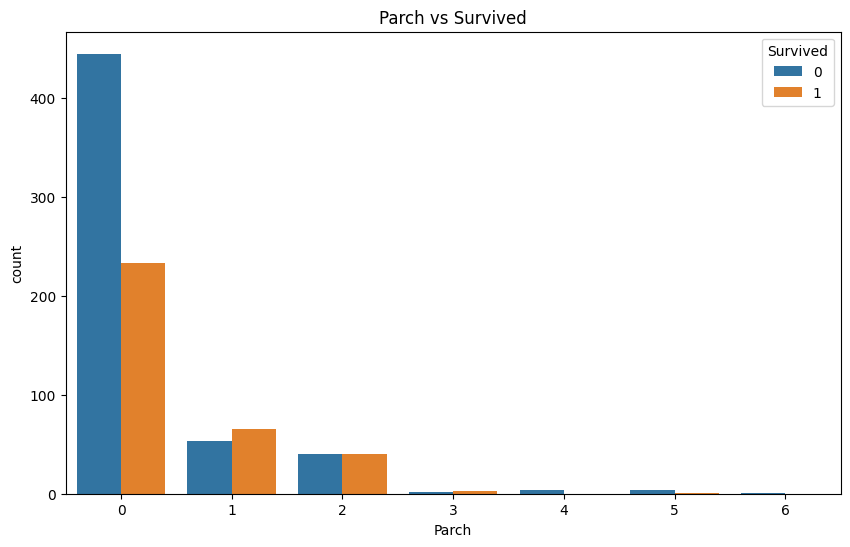

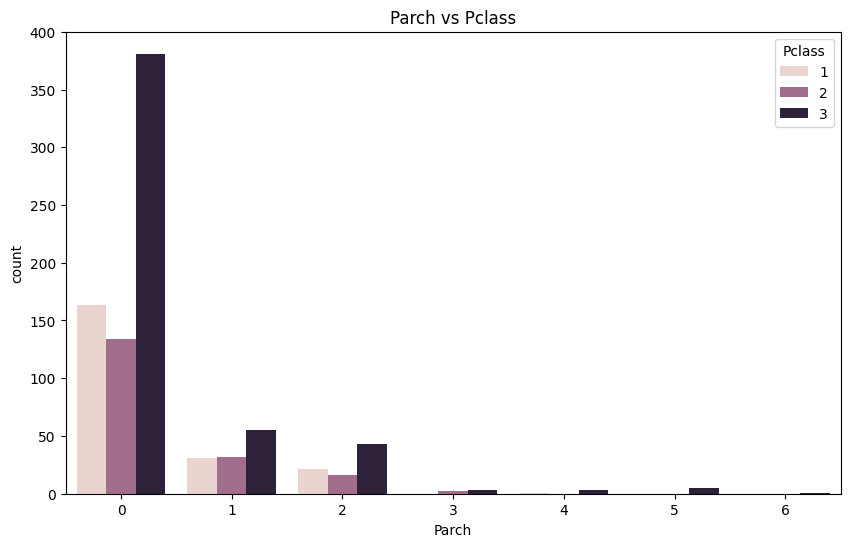

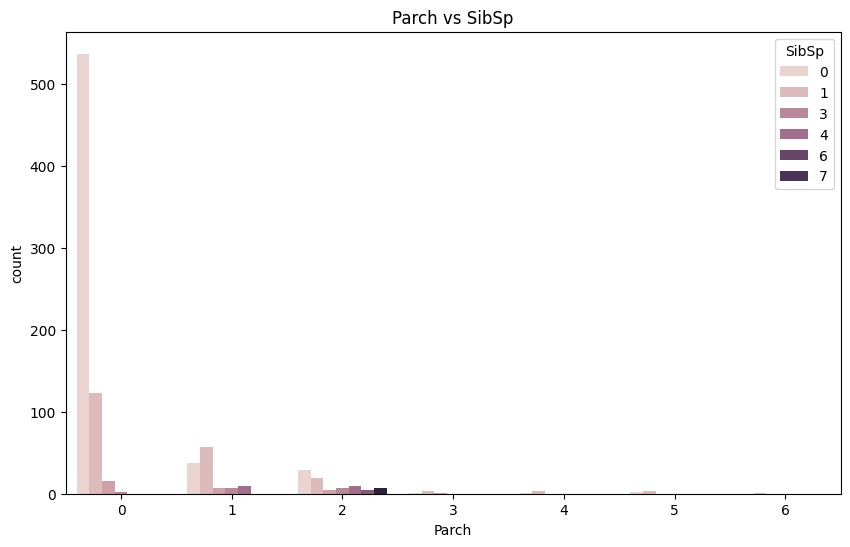

In [ ]:
for cat1 in discrete:
    for cat2 in discrete:
        if cat1 != cat2:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=data, x=cat1, hue=cat2)
            plt.title(f'{cat1} vs {cat2}')
            plt.xticks(rotation = 360)
            plt.show()

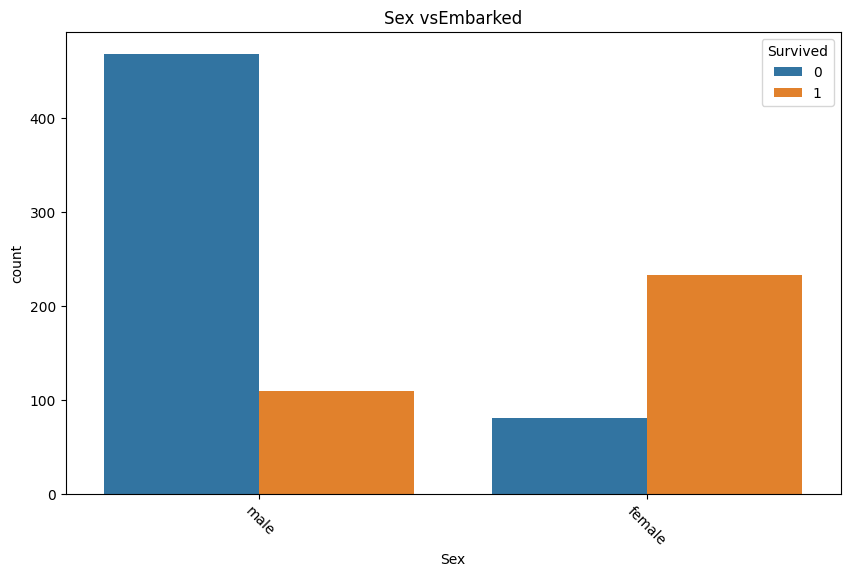

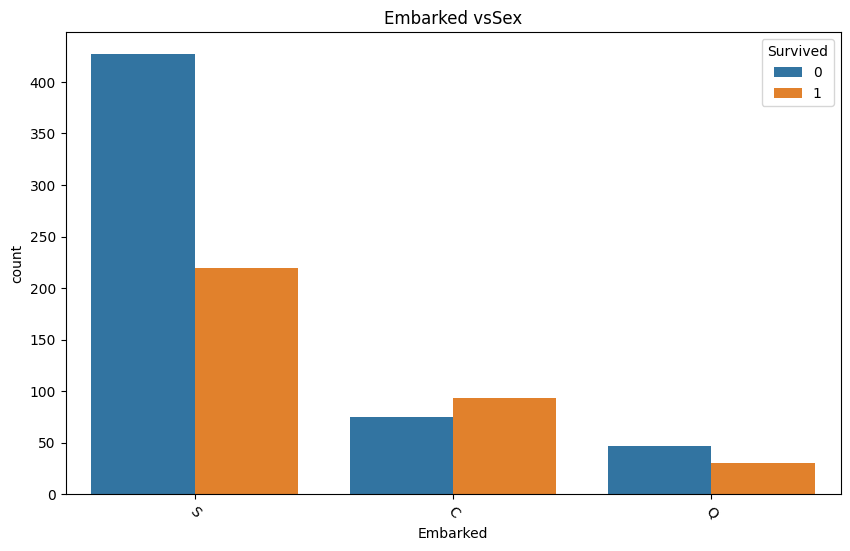

In [ ]:
for cat1 in categorical:
    for cat2 in categorical:
        if cat1 != cat2:
            plt.figure(figsize=(10, 6))
            sns.countplot(data = data, x = cat1, hue = 'Survived')
            plt.title(f'{cat1} vs{cat2}')
            plt.xticks(rotation = -45)
            plt.show()

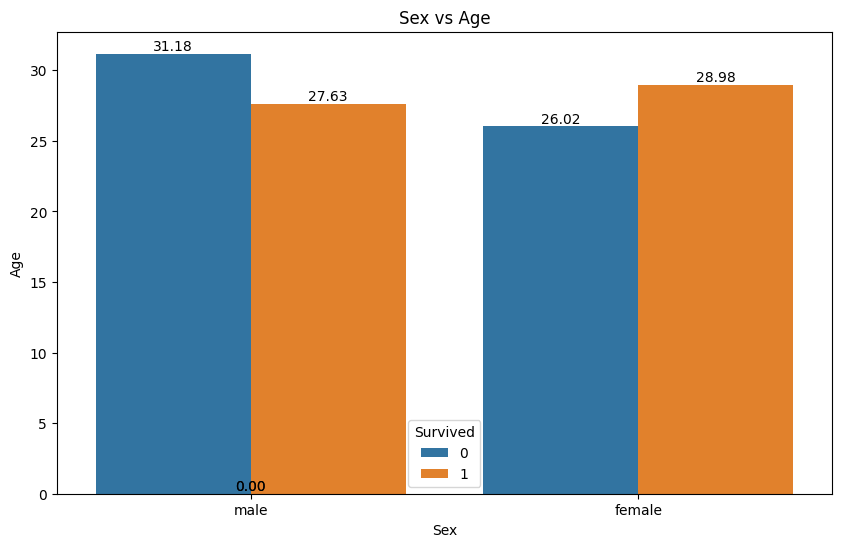

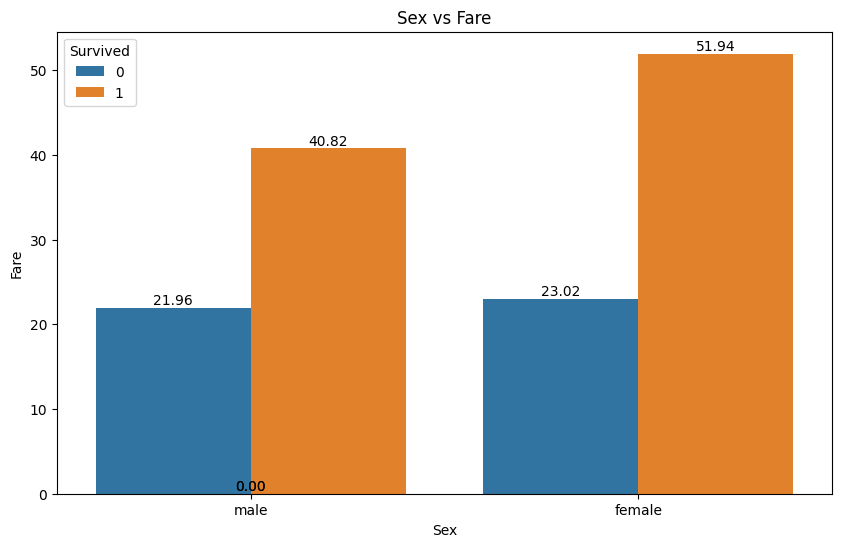

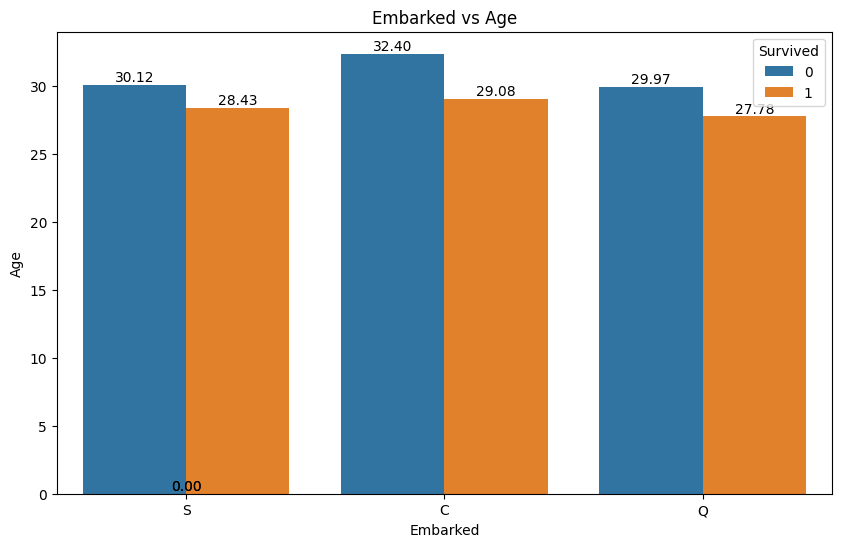

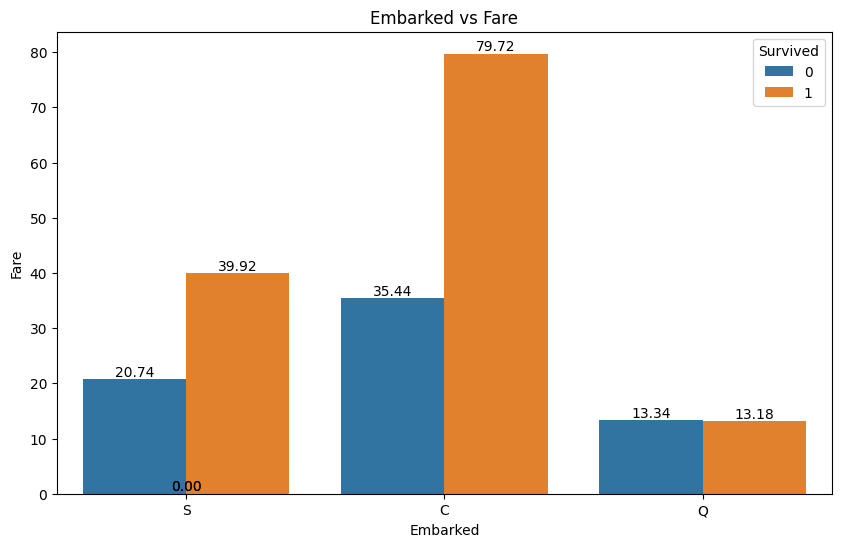

In [ ]:
for cat in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=data, x=cat, y=cont, hue = 'Survived', ci=None)
        plt.title(f'{cat} vs {cont}')

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 360)
        plt.show()

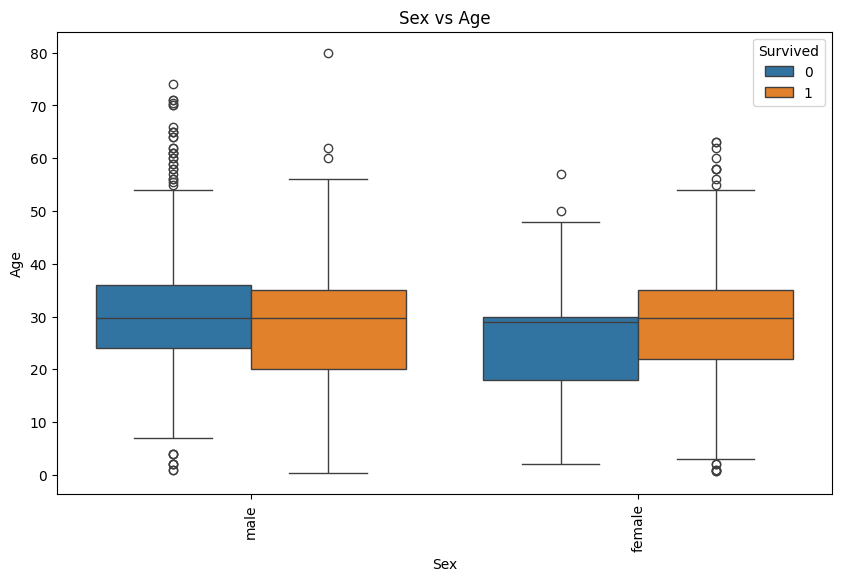

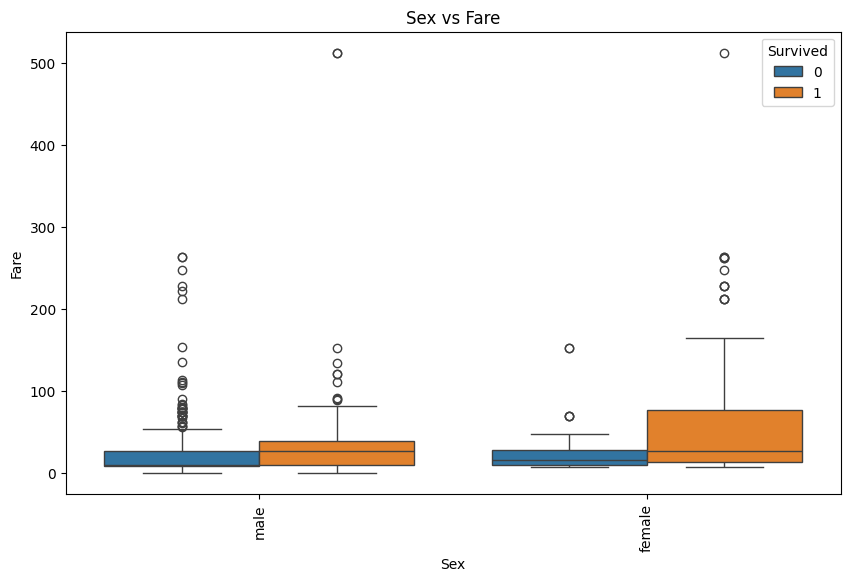

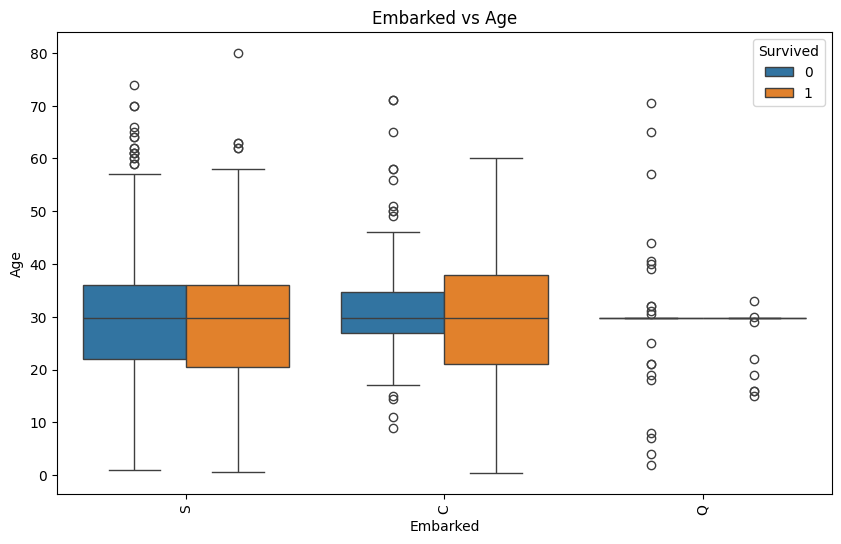

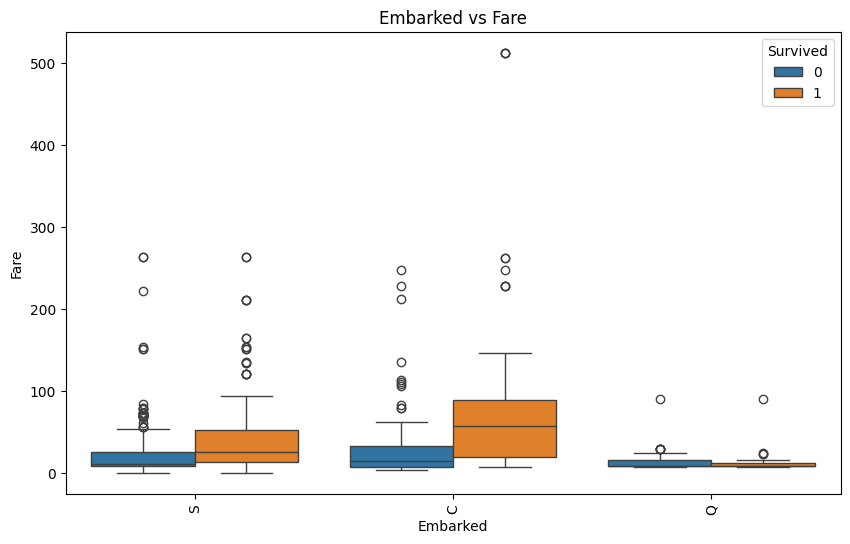

In [ ]:
for cat in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.boxplot(data=data, x=cat, y=cont, hue = 'Survived')
        plt.title(f'{cat} vs {cont}')
        plt.xticks(rotation = 90)
        plt.show()

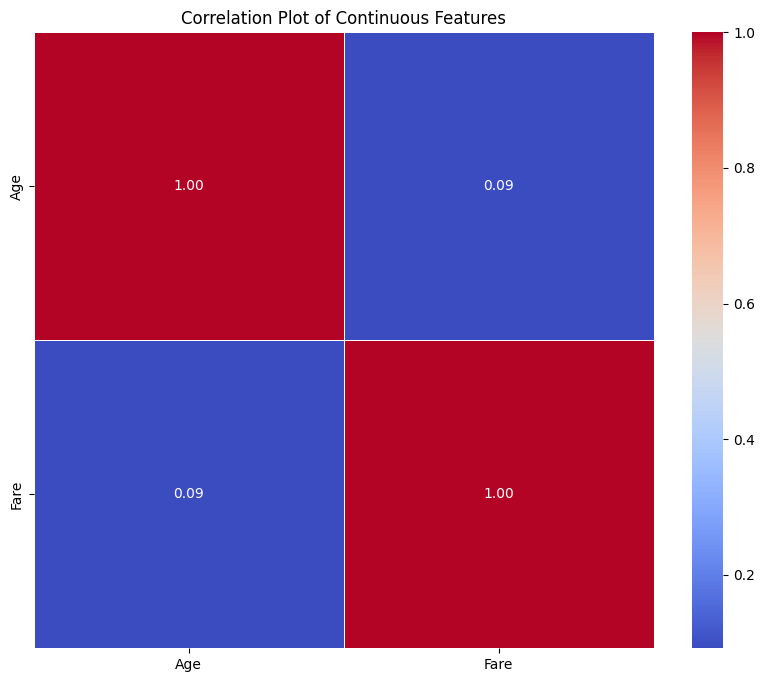

In [ ]:
corr_matrix = data[continuous].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [ ]:
avg_fare_by_gender = data.groupby('Sex')[['Age', 'Fare']].mean().sort_values(by = 'Age', ascending=False)
avg_fare_by_gender

,Age,Fare
Sex,,
male,30.505824,25.523893
female,28.216730,44.479818


In [ ]:
avg_fare_by_gender = data.groupby(['Sex', 'Survived'])[['Age', 'Fare']].mean().sort_values(by = 'Age', ascending=False)
avg_fare_by_gender

,,Age,Fare
Sex,Survived,,
male,0,31.175224,21.960993
female,1,28.979263,51.938573
male,1,27.631705,40.821484
female,0,26.023272,23.024385


In [ ]:
data = pd.get_dummies(data, columns = ['Sex', 'Embarked'])

In [ ]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [ ]:
X = data.drop('Survived', axis = 1)
y = data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
##The stratify parameter ensures that the distribution of classes in the training and testing sets is the same as the distribution in the original dataset.
##This is particularly useful when dealing with imbalanced datasets, where some classes might be underrepresented.

## Random state is used in the shufflingof data before splitting that means how many times we run the code the same train_test splitting will be done.

In [ ]:
## We can't train an unbalanced data. To balance this data we use random sampling by using SMOTE(Synthetic Minority Oversampling Technique)
## in which we increase the number of minority class samples to make them equal to number of majority samples.
from sklearn.linear_model import LogisticRegression

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
## We should not resample on the test data but only on the train data
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
print(len(X_train))
print(len(X_train_res))
print(len(y_train))
print(len(y_train_res))

712
878
712
878


In [ ]:
y_train_res.value_counts()

Survived
1    439
0    439
Name: count, dtype: int64

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
##    Confusion Matrix
## The model sometimes confuse to interpret the class . So it mis-interprets the data such as 0 for 1 and 1 for 0.

##                                                                          Actual
##                                              0(positive)                                1(negative)

##                                0           True Positive                             False Positive
##    Predicted
##                                1           False Negative                          True Negative



##                                                                                                                            Actual

##                                                        0(positive)                                               1(negative)                                               2(neutral)

##                                0                      True positive                                            False positive                                            False positive

##    Predicted             1                      False negative                                          True negative                                           False negative

##                                2                      False neutral                                            False neutral                                             True neutral

In [ ]:
## Precision :  fraction of true positive predictions out of all positive predictions made by the model.
##         precision = TP / (TP + FP)

## Recall : fraction of true positive out of all actual positives
##        recall = TP / (TP + FN)

## F1 Score : F1 score is the harmonic mean of precision and recall, which provides a balance between precision and recall
##         f1_score = 2 * (precision * recall) / (precision + recall)

## Support : the number of actual instances of each class in the dataset.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc

In [ ]:
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

# calculate precision
precision = precision_score(y_test, y_pred)

print(precision)

# calculate recall
recall = recall_score(y_test, y_pred)

print(recall)

# calculate F1 score
f1 = f1_score(y_test, y_pred)

print(f1)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

y_prob = logreg.predict_proba(X_test)

## precision, recall, f1_score, support, accuracy, macro avg and weighted avg will be seperately calculated for both the classes
cr = classification_report(y_test, y_pred)
print(cr)

0.8044692737430168
0.7575757575757576
0.7246376811594203
0.7407407407407408
[[94 16]
 [19 50]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
## The average of both classes's precision, recall, f1_score and support will be calculated by  macro avg
##  The weighted average will be ((0_support * 0_precision) + (1_support * 1_precision)) / (0_support + 1_support)

In [ ]:
!pip install scikit-plot

In [ ]:
from scikitplot.metrics import plot_confusion_matrix, plot_roc

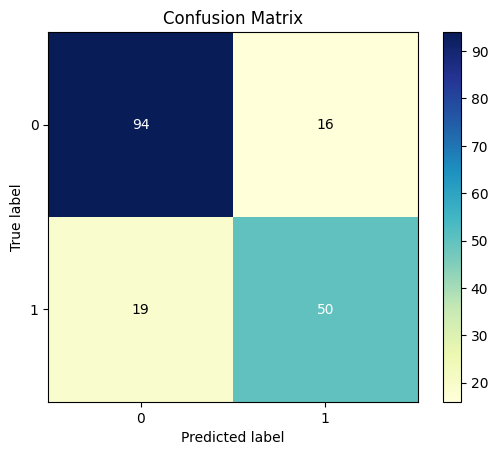

In [ ]:
plot_confusion_matrix(y_test, y_pred, cmap= 'YlGnBu')
plt.show()

In [ ]:
## False positive rate is how much proportion of negative values got incorrectly classified by the classifier
## True Positive rate is how much proportion of positive values are correctly classified by the classifier

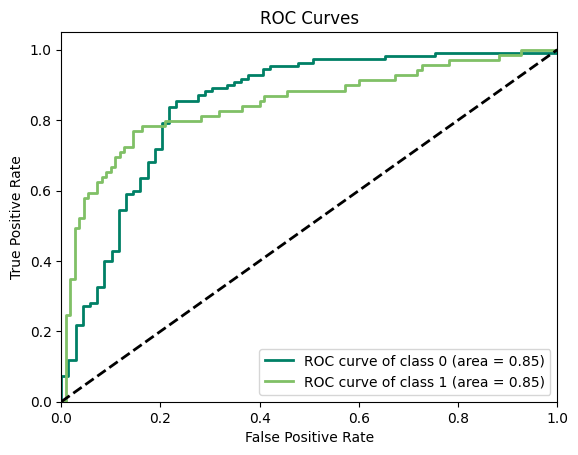

In [ ]:
##ROC(Receiver Operating Characteristic) The more the curve touches the top the more the accuracy.
## AUC(Area Under Curve) if region bounded is more accuracy is more . If bounded region is less accuracy is less.
plot_roc(y_test, y_prob, plot_macro= False, plot_micro= False, cmap= 'summer')
plt.show()